# Multi-layer perceptron 

In questo tutorial impareremo ad implementare un semplice multi layer perceptron per eseguire lo xor (logico) utilizzando la libreria Tensorflow, in seguito mostreremo come è possibile implementare lo stesso codice in maniera piu veloce in Keras.

<img style="float: left;" src="images/mlp.png">

## Tensorflow

Per implementare reti neurali in Tensorflow bisogna capire attentanmente il concetto di grafo computazionale:

<img style="float: center;" src="images/tensors_flowing.gif">

Come prima cosa definiamo le variabili e i placeholders del grafo computazionale:

In [1]:
import tensorflow as tf

x = tf.placeholder("float", [None, 2])
y = tf.placeholder("float", [None, 1])


w1 = tf.Variable(tf.random_normal([2, 4]))
b1 = tf.Variable(tf.random_normal([4]))
w2 = tf.Variable(tf.random_normal([4, 1]))
b2 = tf.Variable(tf.random_normal([1]))

Ora invece definiamo le operazioni del forward pass:

In [2]:
# Hidden Layer
h1 = tf.add(tf.matmul(x, w1), b1)
h1 = tf.sigmoid(h1)

# Output Layer

out = tf.add(tf.matmul(h1, w2), b2)
out = tf.sigmoid(out)

In [3]:
cross_entropy = lambda p, y: -tf.reduce_sum(y * tf.log(p))
cost = tf.reduce_mean(cross_entropy(out, y))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [4]:
init = tf.initialize_all_variables()

In [5]:
import numpy as np

X_train = np.array([[0,1],
                   [1,0],
                   [1,1],
                   [0,0]])

y_train = np.array([[0],
                    [0],
                    [1],
                    [1]])

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(10000):
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: X_train,
                                                          y: y_train})
        # Display logs per epoch step
            if epoch % 1000 == 0:
                print "Epoch:", '%04d' % (epoch+1), "cost=", \
                    "{:.9f}".format(c)
    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(out, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy:", accuracy.eval({x: X_train, y: y_train})

Epoch: 0001 cost= 0.081617817
Epoch: 1001 cost= 0.005487163
Epoch: 2001 cost= 0.001740950
Epoch: 3001 cost= 0.000779804
Epoch: 4001 cost= 0.000401365
Epoch: 5001 cost= 0.000221505
Epoch: 6001 cost= 0.000126843
Epoch: 7001 cost= 0.000074269
Epoch: 8001 cost= 0.000044108
Epoch: 9001 cost= 0.000026465
Optimization Finished!
Accuracy: 1.0


## Keras

Il multi layer perceptrion (MLP) rappresentato in figura può essere definito in Keras in poche linee di codice.

In [6]:
import numpy as np
np.random.seed(1337)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4, activation='sigmoid', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 4)             12          dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             5           dense_1[0][0]                    
Total params: 17
____________________________________________________________________________________________________


Using TensorFlow backend.


compilare il modello:


 - Costruzione del grafo di computazione
 - Inizializzazione dei pesi (W<sub>1</sub>, W<sub>2</sub>)
 - Definizione della loss (binary_crossentropy)
 - Definizione dell'optimizer (Stocastic Gradient Descend)
 - Definizione delle metriche da monitorare durante il training (default loss)

In [7]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

I pesi W<sub>1</sub>, W<sub>2</sub> sono inizializzati a random. Quindi l'output del nostro modello sarà casuale.

In [8]:
X_test = np.array([[0,1],
                   [1,0],
                   [1,1],
                   [0,0]])

pred = model.predict(X_test, verbose=False)

pred

array([[ 0.74935615],
       [ 0.70638096],
       [ 0.74604905],
       [ 0.70316994]], dtype=float32)

Per addestrare il modello dichiariamo (carichiamo) il nostro training set:


In [9]:
X_train = np.array([[0,1],
                   [1,0],
                   [1,1],
                   [0,0]])

y_train = np.array([[0],
                    [0],
                    [1],
                    [1]])

Utilizzando la funzione 'fit' è possibile addestrare il modello.

In [12]:
history = model.fit(X_train, y_train, nb_epoch=10000, verbose=False, )


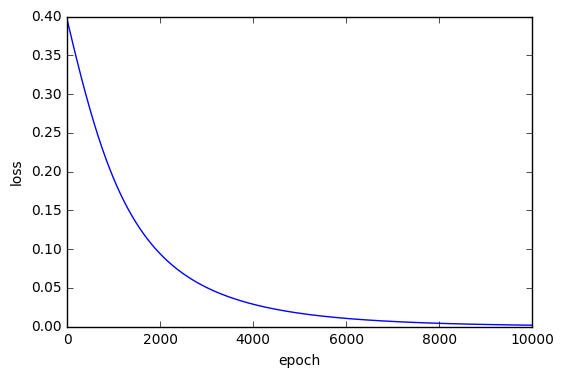

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [14]:
X_test = np.array([[0,1],
                   [1,0],
                   [1,1],
                   [0,0]])

pred = model.predict(X_test, verbose=False)

pred

array([[ 0.00142648],
       [ 0.0013868 ],
       [ 0.99797434],
       [ 0.99820304]], dtype=float32)

# Le API funzionali

In [15]:
from keras.models import Model
from keras.layers import Dense, Input, merge

x  = Input(shape=(2,))
h1 = Dense(4, activation='relu')(x)
y = Dense(1, activation='sigmoid')(h1)
model = Model(input=[x], output=[y])

A differenza del modello sequenziale la API funzionale di Keras permette di inizializzare i vari layer in maniera indipendente. Questo permette di creare modelli piu complessi, come ad esempio modelli con input o output multipli.

In [16]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, nb_epoch=10000, verbose=False)

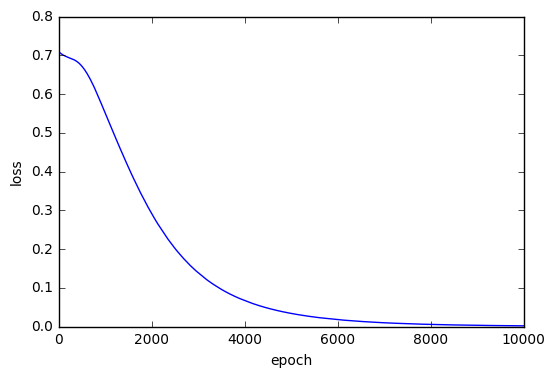

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [19]:
X_test = np.array([[0,1],
                   [1,0],
                   [1,1],
                   [0,0]])

pred = model.predict(X_test, verbose=False)

pred

array([[ 0.00169835],
       [ 0.00169906],
       [ 0.99830449],
       [ 0.9981817 ]], dtype=float32)